## 8. Regression Analysis

### This script contains the following:
1. Importing libraries and data
2. Data cleaning for regression analysis
3. Data prepping for regression analysis
4. Regression Analysis
5. Exporting dataframe

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Show created graphs in notebook without calling them

%matplotlib inline

In [3]:
path = r'C:\Users\Neena Tilton\Dropbox\Projects\MinWage_Crime'

In [4]:
df = pd.read_pickle(os.path.join(path, '02_Data', 'PreparedData', 'df_newvar.pkl'))

### 2. Data cleaning for regression analysis

In [5]:
df.columns

Index(['Year', 'State', 'state_mw', 'state_mw_2020', 'fed_mw', 'fed_mw_2020',
       'effective_mw', 'effective_mw_2020', 'prisoner_count',
       'state_population', 'violent_crime', 'murder', 'robbery', 'burglary',
       'incarceration_rate', 'rate_rank', 'avg_rate_of_year'],
      dtype='object')

In [6]:
# Create a subset data containing only columns needed for regression analysis

df_sub = df[['Year','state_mw','fed_mw', 'violent_crime', 'burglary',
       'incarceration_rate', 'avg_rate_of_year']]

In [7]:
df_sub.columns

Index(['Year', 'state_mw', 'fed_mw', 'violent_crime', 'burglary',
       'incarceration_rate', 'avg_rate_of_year'],
      dtype='object')

#### Check for missing value

In [8]:
df_sub.isnull().sum()

Year                  0
state_mw              0
fed_mw                0
violent_crime         0
burglary              0
incarceration_rate    0
avg_rate_of_year      0
dtype: int64

No missing values.

#### Check for duplicate value 

In [9]:
df_dups = df_sub.duplicated()

In [10]:
df_dups.shape

(800,)

No duplicate values.

#### Check for extreme values

C:\Users\Neena Tilton\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

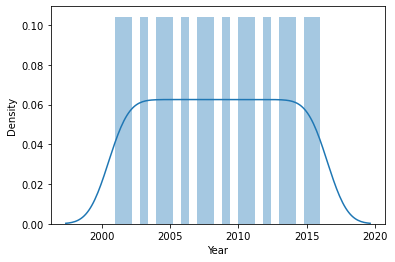

In [11]:
sns.distplot(df_sub['Year'], bins = 25)

C:\Users\Neena Tilton\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='state_mw', ylabel='Density'>

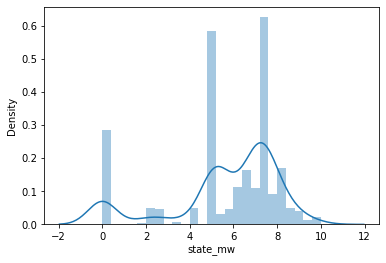

In [12]:
sns.distplot(df_sub['state_mw'], bins = 25)

C:\Users\Neena Tilton\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='violent_crime', ylabel='Density'>

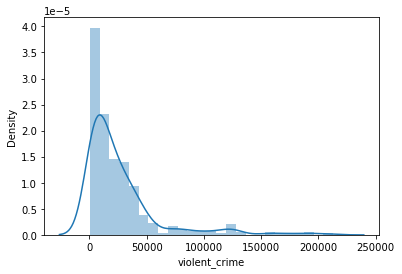

In [13]:
sns.distplot(df_sub['violent_crime'], bins = 25)

C:\Users\Neena Tilton\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='burglary', ylabel='Density'>

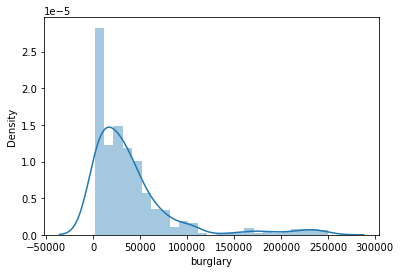

In [14]:
sns.distplot(df_sub['burglary'], bins = 25)

C:\Users\Neena Tilton\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='incarceration_rate', ylabel='Density'>

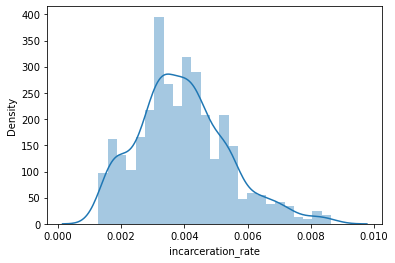

In [15]:
sns.distplot(df_sub['incarceration_rate'], bins = 25)

C:\Users\Neena Tilton\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_rate_of_year', ylabel='Density'>

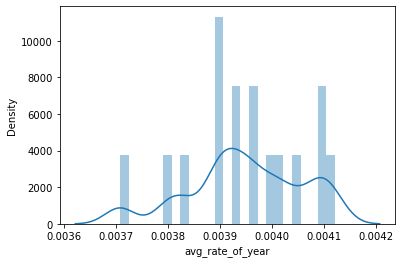

In [16]:
sns.distplot(df_sub['avg_rate_of_year'], bins = 25)

C:\Users\Neena Tilton\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fed_mw', ylabel='Density'>

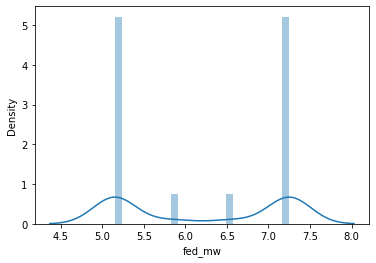

In [17]:
sns.distplot(df_sub['fed_mw'], bins = 25)

No unreasonably extreme values present.

### 3. Data prep for regression analysis

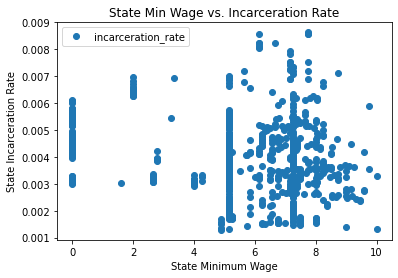

In [53]:
# Creating a scatterplot first to see relationships between chosen variables.
# For Min Wage & Incarceration Rate

min_inc = df_sub.plot(x = 'state_mw', y = 'incarceration_rate', style = 'o')
plt.title('State Min Wage vs. Incarceration Rate')
plt.xlabel('State Minimum Wage')
plt.ylabel('State Incarceration Rate')
plt.show()

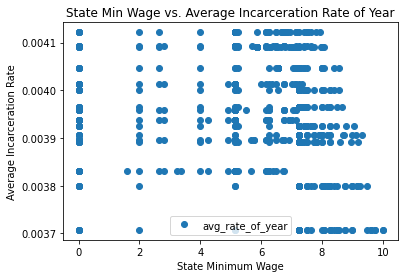

In [19]:
# For State Min Wage and Average Incarceration Rate of Year

df_sub.plot(y = 'avg_rate_of_year', x = 'state_mw',  style = 'o')
plt.title('State Min Wage vs. Average Incarceration Rate of Year')
plt.xlabel('State Minimum Wage')
plt.ylabel('Average Incarceration Rate')
plt.show()

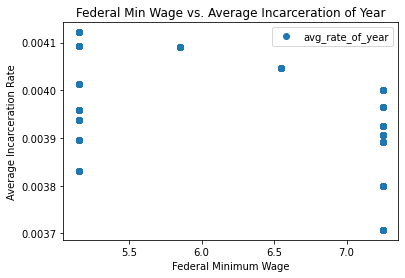

In [20]:
# For Federal Min Wage and Average Incarceration Rate of Year

df_sub.plot(x = 'fed_mw', y = 'avg_rate_of_year',   style = 'o')
plt.title('Federal Min Wage vs. Average Incarceration of Year')
plt.xlabel('Federal Minimum Wage')
plt.ylabel('Average Incarceration Rate')
plt.show()

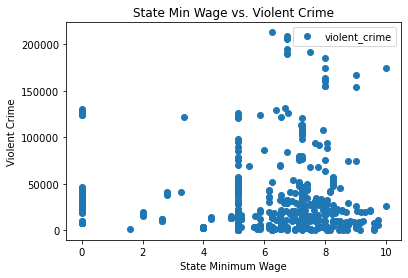

In [21]:
# For State Min Wage and Violent Crimes

df_sub.plot(x = 'state_mw', y = 'violent_crime',   style = 'o')
plt.title('State Min Wage vs. Violent Crime')
plt.xlabel('State Minimum Wage')
plt.ylabel('Violent Crime')
plt.show()

The 'violent_crime' numbers are disproportionate to one another in isolation. Violent crime will perhaps be higher in places with higher population. Interested to see if there are any relationships with state minimum wage against violent crime RATE (count of crime/total state population). Adding a new variable as 'violent_crime_rate' to the main df. 

In [22]:
df['viol_crime_rate'] = (df['violent_crime']/df['state_population'])

In [23]:
df.head()

,Year,State,state_mw,state_mw_2020,fed_mw,fed_mw_2020,effective_mw,effective_mw_2020,prisoner_count,state_population,violent_crime,murder,robbery,burglary,incarceration_rate,rate_rank,avg_rate_of_year,viol_crime_rate
0,2001,Alabama,0.00,0.00,5.15,7.52,5.15,7.52,24741.0,4468912.0,19582.0,379.0,5584.0,40642.0,0.005536,High,0.003832,0.004382
1,2001,Alaska,5.65,8.25,5.15,7.52,5.65,8.25,4570.0,633630.0,3735.0,39.0,514.0,3847.0,0.007212,Unusually High,0.003832,0.005895
2,2001,Arizona,0.00,0.00,5.15,7.52,5.15,7.52,27710.0,5306966.0,28675.0,400.0,8868.0,54821.0,0.005221,High,0.003832,0.005403
3,2001,Arkansas,5.15,7.52,5.15,7.52,5.15,7.52,11489.0,2694698.0,12190.0,148.0,2181.0,22196.0,0.004264,Medium,0.003832,0.004524
4,2001,California,6.25,9.13,5.15,7.52,6.25,9.13,157142.0,34600464.0,212867.0,2206.0,64614.0,232273.0,0.004542,Medium,0.003832,0.006152


In [24]:
df_sub_2 = df[['state_mw','fed_mw', 'viol_crime_rate']]

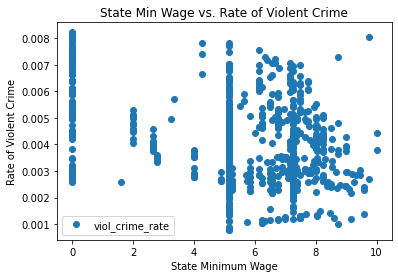

In [25]:
# Scatterplot to see relationships

min_viol = df_sub_2.plot(x = 'state_mw', y = 'viol_crime_rate',   style = 'o')
plt.title('State Min Wage vs. Rate of Violent Crime')
plt.xlabel('State Minimum Wage')
plt.ylabel('Rate of Violent Crime')
plt.show()

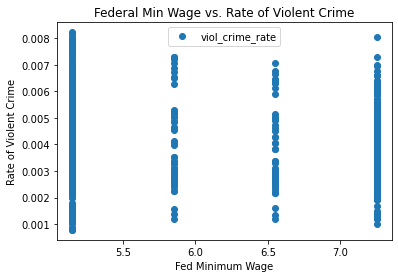

In [26]:
df_sub_2.plot(x = 'fed_mw', y = 'viol_crime_rate',   style = 'o')
plt.title('Federal Min Wage vs. Rate of Violent Crime')
plt.xlabel('Fed Minimum Wage')
plt.ylabel('Rate of Violent Crime')
plt.show()

Ultimately, I am interested in the following relationships: State Min Wage impact on Incarceration Rate AND State Min Wage impact on Rate of Violent Crimes. 

#### Hypothesis
 
1. Increased State Min Wage decreases Incarceration Rate 
2. Increased State Min Wage decreases Rate of Violent Crimes. 

#### Split variables into training set and testing set

Prep data for linear regression for first hypothesis.

In [27]:
X1 = df_sub['state_mw'].values.reshape(-1,1)
y1 = df_sub['incarceration_rate'].values.reshape(-1,1)

In [28]:
X1.shape

(800, 1)

In [29]:
y1.shape

(800, 1)

In [30]:
# Split into training and testing

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state = 0)

Prep data for linear regression for the second hypothesis.

In [31]:
X2 = df_sub_2['state_mw'].values.reshape(-1,1)
y2 = df_sub_2['viol_crime_rate'].values.reshape(-1,1)

In [32]:
X2.shape

(800, 1)

In [33]:
y2.shape

(800, 1)

In [34]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state = 0)

### 4. Regression Analysis

Two separate linear regression analysis will be conducted. 

In [35]:
# Create lr_1 and lr_2 objects

lr_1 = LinearRegression()

In [36]:
lr_2 = LinearRegression()

In [37]:
# Fit lr_1 with training set

lr_1.fit(X1_train, y1_train)

LinearRegression()

In [38]:
# Fir lr_2 with training set

lr_2.fit(X2_train, y2_train)

LinearRegression()

In [39]:
# Have lr_1 predict values of y1 using testing set

y1_predicted = lr_1.predict(X1_test)

In [40]:
# Have lr_2 predict values of y2 using testing set

y2_predicted = lr_2.predict(X2_test)

Plotting the regression line of model 1: State Min Wage vs. Incarceration Rate

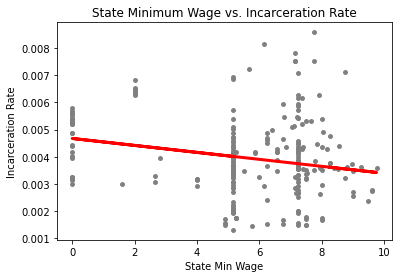

In [41]:
# Create a plot that shows the regression line of model (lr_1) on the test set. 

plot_test = plt
plot_test.scatter(X1_test, y1_test, color = 'gray', s = 15)
plot_test.plot(X1_test, y1_predicted, color = 'red', linewidth = 3)
plot_test.title('State Minimum Wage vs. Incarceration Rate')
plot_test.xlabel('State Min Wage')
plot_test.ylabel('Incarceration Rate')
plot_test.show()

In [42]:
# Create objects that contain the model summary statistics.

rmse_1 = mean_squared_error(y1_test, y1_predicted)
r2_1 = r2_score(y1_test, y1_predicted)

In [43]:
print('Slope:' ,lr_1.coef_)
print('Mean squared error: ', rmse_1)
print('R2 score: ', r2_1)

Slope: [[-0.00012837]]
Mean squared error:  2.0452674e-06
R2 score:  0.0338119339145474


There is a negative relationship between the variables, however, the R2 score is far too low to imply any statistical significance. 

Plotting the regression line of model 2: State Min Wage vs. Violent Crime Rate

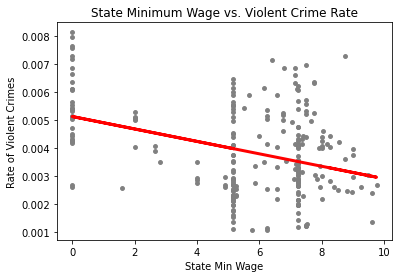

In [44]:
# Create a plot that shows the regression line of model (lr_2) on the test set. 

plot_test = plt
plot_test.scatter(X2_test, y2_test, color = 'gray', s = 15)
plot_test.plot(X2_test, y2_predicted, color = 'red', linewidth = 3)
plot_test.title('State Minimum Wage vs. Violent Crime Rate')
plot_test.xlabel('State Min Wage')
plot_test.ylabel('Rate of Violent Crimes')
plot_test.show()

In [45]:
# Create objects that contain the model summary statistics.

rmse_2 = mean_squared_error(y2_test, y2_predicted)
r2_2 = r2_score(y2_test, y2_predicted)

In [46]:
print('Slope:' ,lr_2.coef_)
print('Mean squared error: ', rmse_2)
print('R2 score: ', r2_2)

Slope: [[-0.00022274]]
Mean squared error:  2.2080362e-06
R2 score:  0.1262079976387399


There is a negative relationship between the variables, however, the R2 score for this model is still far too low to imply any statistical significance. 

### 5. Export Dataframe & Save visuals

In [47]:
df.to_pickle(os.path.join(path, '02_Data','PreparedData', 'df_newvar_2.pkl'))

In [49]:
min_viol.figure.savefig(os.path.join(path, '04_Analysis','mw_viol.png'))

In [54]:
min_inc.figure.savefig(os.path.join(path, '04_Analysis','mw_inc.png'))